#  Creating CNN And Transfer Learning
## Please download the dataset from the below url

In [10]:
# Importing all the necessary libraries and modules

# Import essential layers from Keras for building and customizing deep learning models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D

# Import Model class for defining complex architectures using Functional API
from tensorflow.keras.models import Model

# Import the pre-trained VGG19 model for transfer learning
from tensorflow.keras.applications.vgg19 import VGG19

# Import preprocessing function for ResNet50 (can be used for normalizing input images)
from tensorflow.keras.applications.resnet50 import preprocess_input

# Import image-related utilities for loading and processing images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Import Sequential class for creating simple, layer-by-layer models
from tensorflow.keras.models import Sequential

# Import NumPy for numerical computations and array handling
import numpy as np

# Import glob for fetching file paths and image datasets from directories
from glob import glob

# Import Matplotlib for data visualization and plotting graphs
import matplotlib.pyplot as plt


In [11]:
# Define the image size to which all input images will be resized
# Most pre-trained models (like VGG19) expect 224x224 pixel images
IMAGE_SIZE = [224, 224]

# Specify the directory path for the training dataset
# This folder should contain subfolders representing different classes
train_path = 'cell_images/Train'

# Specify the directory path for the validation (or testing) dataset
# This will be used to evaluate model performance on unseen data
valid_path = 'cell_images/Test'


In [12]:
# Import the pre-trained VGG19 model from Keras applications
# Add a preprocessing layer at the beginning to match input requirements

# Initialize the VGG19 model with the following parameters:
# - input_shape: Defines the size of the input images (224x224x3)
# - weights: 'imagenet' means the model will use pre-trained weights from the ImageNet dataset
# - include_top=False removes the fully connected (classification) layers at the top
#   so we can add our own custom layers for the specific classification task
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [13]:
# Freeze all the layers of the pre-trained VGG19 model
# This means the existing ImageNet-trained weights will not be updated during training
# By doing this, we keep the learned features from ImageNet intact and only train the new layers we add later
for layer in mobilnet.layers:
    layer.trainable = False


In [14]:
# Get the list of all class folders in the training dataset directory
# Each subfolder inside 'Dataset/Train' represents a separate class label (e.g., 'Healthy', 'Infected')
# 'glob' is used to fetch the full paths of these subfolders
# This helps determine the total number of output classes for the classification layer
folders = glob('Dataset/Train/*')


In [15]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [16]:
# Flatten the output of the VGG19 model to convert it from a 3D feature map to a 1D feature vector
# This step prepares the data for the fully connected (Dense) layers that will be added next
# You can add more layers (like Dense, Dropout, or BatchNormalization) after this to improve performance
x = Flatten()(mobilnet.output)


In [17]:
# Add the output layer for classification
# 'len(folders)' automatically sets the number of output neurons equal to the number of classes
# 'softmax' activation ensures the output values represent class probabilities (summing up to 1)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the final model by specifying:
# - inputs: the input layer of the pre-trained VGG19 model
# - outputs: the new prediction layer added above
# This forms a complete model combining pre-trained VGG19 features and custom classification layers
model = Model(inputs=mobilnet.input, outputs=prediction)


In [18]:
# Display the complete architecture of the model
# model.summary() provides a detailed layer-by-layer overview, including:
# - Layer names and types
# - Output shape of each layer
# - Number of trainable and non-trainable parameters
# This helps verify that the model is correctly built and that only the intended layers are trainable
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [19]:
# Import MaxPooling2D layer from Keras
# MaxPooling2D is used to reduce the spatial dimensions (height and width) of feature maps
# It helps in minimizing computational complexity and prevents overfitting by summarizing feature information
from tensorflow.keras.layers import MaxPooling2D


In [20]:
### Create a Convolutional Neural Network (CNN) model from scratch using Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
# Sequential allows us to stack layers in a linear order
model = Sequential()

# First convolutional layer
# - 16 filters of size 2x2
# - 'same' padding keeps output size same as input
# - 'relu' activation introduces non-linearity
# - input_shape=(224,224,3) specifies input image dimensions (RGB)
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(224,224,3)))

# First max pooling layer
# - Pool size of 2x2 reduces spatial dimensions by half
# - Helps reduce computation and extract dominant features
model.add(MaxPooling2D(pool_size=2))

# Second convolutional layer
# - 32 filters of size 2x2
# - 'same' padding maintains spatial dimensions
# - 'relu' activation introduces non-linearity
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))

# Second max pooling layer
# - Further reduces spatial dimensions
model.add(MaxPooling2D(pool_size=2))

# Third convolutional layer
# - 64 filters of size 2x2
# - 'same' padding maintains spatial dimensions
# - 'relu' activation introduces non-linearity
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))

# Third max pooling layer
# - Reduces spatial dimensions
# - Helps in extracting dominant features and reducing overfitting
model.add(MaxPooling2D(pool_size=2))

# Flatten the 3D feature maps into a 1D vector for fully connected layers
model.add(Flatten())

# Fully connected (Dense) layer with 500 neurons and ReLU activation
# - Learns complex feature representations from flattened vector
model.add(Dense(500, activation="relu"))

# Output layer with 2 neurons (for binary classification) and softmax activation
# - Produces probability distribution for each class
model.add(Dense(2, activation="softmax"))

# Display the model summary
# - Shows layer-by-layer architecture
# - Output shapes
# - Number of trainable parameters
model.summary()


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │      25,088,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,100,046 (95.75 MB)

 Trainable params: 25,100,046 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the CNN model by specifying the loss function, optimizer, and evaluation metrics
# - loss='categorical_crossentropy': Suitable for multi-class classification problems (use 'binary_crossentropy' for 2-class binary labels)
# - optimizer='adam': Adam optimizer adjusts learning rate adaptively for faster and efficient training
# - metrics=['accuracy']: The model will track accuracy during training and evaluation
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [22]:
# Import ImageDataGenerator from Keras
# ImageDataGenerator allows real-time data augmentation and preprocessing for training and testing datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the training data generator with data augmentation
# - rescale=1./255: Normalize pixel values from [0,255] to [0,1] for better convergence
# - shear_range=0.2: Apply random shear transformations to make the model invariant to shape distortions
# - zoom_range=0.2: Apply random zooms to make the model robust to scale variations
# - horizontal_flip=True: Randomly flip images horizontally to augment training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define the testing/validation data generator
# - Only rescaling is applied; no augmentation to ensure evaluation is on actual image distribution
test_datagen = ImageDataGenerator(rescale=1./255)


In [23]:
# Load the training dataset from the directory using ImageDataGenerator
# - 'Dataset/Train' is the folder containing subfolders for each class
# - target_size=(224,224): Resize all images to match the input size expected by the model
# - batch_size=32: Number of images processed in each training step
# - class_mode='categorical': Labels are converted into one-hot encoded vectors for multi-class classification
training_set = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 416 images belonging to 2 classes.


In [24]:
training_set

In [25]:
# Load the testing/validation dataset from the directory using ImageDataGenerator
# - 'Dataset/Test' is the folder containing subfolders for each class
# - target_size=(224,224): Resize all images to match the input size expected by the model
# - batch_size=32: Number of images processed in each step during evaluation
# - class_mode='categorical': Labels are converted into one-hot encoded vectors for multi-class classification
# Note: No data augmentation is applied here; only rescaling is performed
test_set = test_datagen.flow_from_directory(
    'Dataset/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 134 images belonging to 2 classes.


In [30]:
# Train the CNN model using the training dataset
# model.fit() runs the training loop for the specified number of epochs
# - training_set: The training data generator
# - validation_data=test_set: Use the test/validation data to evaluate the model after each epoch
# - epochs=50: Number of complete passes through the training dataset
# - steps_per_epoch=len(training_set): Number of batches per epoch; typically the total training samples divided by batch size
# - validation_steps=len(test_set): Number of batches to process from the validation set per epoch
# The returned object 'r' stores training history, including loss and accuracy for plotting and analysis
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4808 - loss: 2.7529 - val_accuracy: 0.3358 - val_loss: 1.2537
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5577 - loss: 0.6772 - val_accuracy: 0.4627 - val_loss: 0.7019
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7644 - loss: 0.5450 - val_accuracy: 0.4328 - val_loss: 0.8002
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7404 - loss: 0.4963 - val_accuracy: 0.4254 - val_loss: 0.8647
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7837 - loss: 0.4266 - val_accuracy: 0.4552 - val_loss: 0.9594
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7957 - loss: 0.4369 - val_accuracy: 0.4179 - val_loss: 0.8461
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8245 - loss: 0.4165 - val_accuracy: 0.5448 - val_loss: 0.7782
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8317 - loss: 0.4029 - val_accuracy: 0.5746 - val_loss:

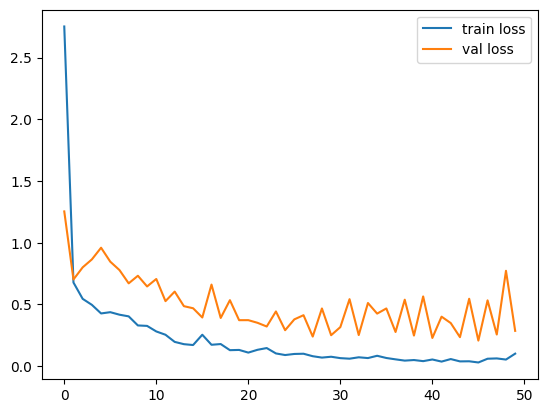

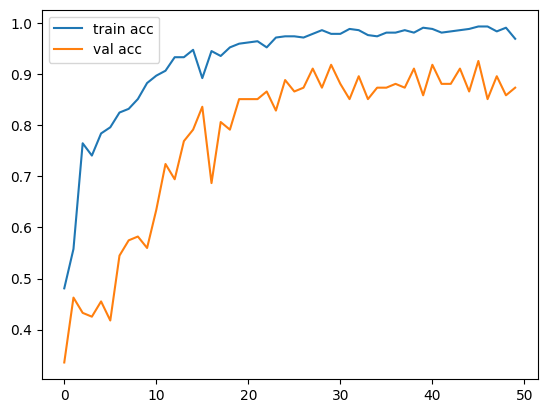

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot the training and validation loss over epochs to visualize model performance

# Plot training loss
plt.plot(r.history['loss'], label='train loss')
# Plot validation loss
plt.plot(r.history['val_loss'], label='val loss')
# Add legend to differentiate between train and validation loss
plt.legend()
# Display the plot
plt.show()
# Save the loss plot as an image file for future reference
plt.savefig('LossVal_loss')

# Plot the training and validation accuracy over epochs

# Plot training accuracy
plt.plot(r.history['accuracy'], label='train acc')
# Plot validation accuracy
plt.plot(r.history['val_accuracy'], label='val acc')
# Add legend to differentiate between train and validation accuracy
plt.legend()
# Display the plot
plt.show()
# Save the accuracy plot as an image file for future reference
plt.savefig('AccVal_acc')


In [95]:
# Import load_model to allow loading saved Keras models later
from tensorflow.keras.models import load_model

# Save the trained model to an H5 file
# - 'model_vgg19.h5' is the filename where the entire model architecture, weights, and optimizer state are stored
# - This allows you to reload the model later without retraining
model.save('model_vgg19.h5')


In [99]:
# Use the trained model to make predictions on the test/validation dataset
# - test_set is the data generator containing validation images
# - model.predict() returns the predicted probabilities for each class for all images in the test set
# - The result 'y_pred' is a NumPy array where each row corresponds to an image and each column corresponds to a class probability
y_pred = model.predict(test_set)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


In [101]:
# Display the predictions made by the model on the test set
# - 'y_pred' contains the probability distribution for each class for every image
# - Each row corresponds to an image, and each column corresponds to a class
# - You can use np.argmax(y_pred, axis=1) to convert these probabilities into the predicted class labels
y_pred


array([[9.99996066e-01, 3.94323843e-06],
       [6.88560680e-02, 9.31143939e-01],
       [1.00000000e+00, 2.98859705e-13],
       [1.22258537e-01, 8.77741396e-01],
       [9.99888301e-01, 1.11726789e-04],
       [9.99359429e-01, 6.40549872e-04],
       [1.00000000e+00, 6.20096151e-13],
       [5.99697053e-01, 4.00302947e-01],
       [4.17408831e-02, 9.58259106e-01],
       [9.99999285e-01, 7.62221759e-07],
       [1.19158670e-01, 8.80841374e-01],
       [9.99992609e-01, 7.41212853e-06],
       [9.99996066e-01, 3.93204027e-06],
       [1.00000000e+00, 1.76044374e-10],
       [9.99982595e-01, 1.74227534e-05],
       [9.99992847e-01, 7.17942567e-06],
       [5.86882606e-02, 9.41311777e-01],
       [9.99999881e-01, 1.07700963e-07],
       [5.27511425e-02, 9.47248876e-01],
       [1.10899629e-02, 9.88910019e-01],
       [3.87204327e-02, 9.61279571e-01],
       [2.94492424e-01, 7.05507576e-01],
       [9.98701692e-01, 1.29824923e-03],
       [9.99979973e-01, 2.00233026e-05],
       [9.999997

In [35]:
# Convert predicted probabilities into class labels
# - np.argmax(y_pred, axis=1) returns the index of the highest probability for each image
# - This index corresponds to the predicted class label
# - After this step, 'y_pred' will contain integer labels representing the predicted class for each test image
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [89]:
# Display the predicted class labels for the test dataset
# - 'y_pred' now contains integer values representing the predicted class for each image
# - These integers correspond to the index of each class folder used during training
# - You can compare these predictions with the true labels to evaluate model performance
y_pred


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1])

In [91]:
# Import load_model to load a previously saved Keras model
# This allows you to use the trained model for predictions without retraining
from tensorflow.keras.models import load_model

# Import image module from Keras for loading and preprocessing single images
# Useful when you want to make predictions on new, individual images
from tensorflow.keras.preprocessing import image


In [92]:
# Load the previously saved VGG19-based model from the H5 file
# - 'model_vgg19.h5' contains the full model architecture, trained weights, and optimizer state
# - After loading, the model can be used for making predictions on new images without retraining
model = load_model('model_vgg19.h5')


In [81]:
# Load a single image from the test dataset for prediction
# - 'Dataset/Test/Uninfected/2.png' is the path to the image file
# - target_size=(224,224) resizes the image to match the input size expected by the model
# - image.load_img() loads the image as a PIL object
img = image.load_img('Dataset/Test/Uninfected/2.png', target_size=(224,224))


In [82]:
# Convert the loaded PIL image to a NumPy array
# - image.img_to_array() converts the image into a 3D array (height, width, channels)
# - This is required because the model expects numerical input rather than a PIL image
# - The resulting array can now be preprocessed and fed into the model for prediction
x = image.img_to_array(img)

# Display the image array to verify its shape and pixel values
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], shape=(224, 224, 3), dtype=float32)

In [83]:
# Check the shape of the image array
# - x.shape will return a tuple representing (height, width, channels)
# - For this image, it should be (224, 224, 3), matching the input size expected by the model
x.shape


(224, 224, 3)

In [84]:
x=x/255

In [85]:
# Add an extra dimension to the image array to match the model's expected input shape
# - np.expand_dims(x, axis=0) converts the shape from (224,224,3) to (1,224,224,3)
# - The first dimension represents the batch size, which is required even for a single image
x = np.expand_dims(x, axis=0)

# Preprocess the image using the preprocessing function compatible with the pre-trained model
# - preprocess_input scales pixel values and performs any normalization required by VGG19/ResNet50
# - This ensures the input image has the same format as the images used during model training
img_data = preprocess_input(x)

# Display the shape of the preprocessed image data
# - The expected shape is (1, 224, 224, 3)
img_data.shape


(1, 224, 224, 3)

In [86]:
# Use the trained model to predict the class of the single preprocessed image
# - img_data is a 4D array with shape (1, 224, 224, 3), matching the model's input requirements
# - model.predict() returns the probability for each class
# - The output will be a NumPy array where each element corresponds to the predicted probability for each class
model.predict(img_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[1., 0.]], dtype=float32)

In [87]:
# Convert the predicted probabilities into a class label
# - np.argmax() returns the index of the highest probability in the output array
# - axis=1 ensures we get the predicted class for each image in the batch (even though there's only one image)
# - The result 'a' will be an integer representing the predicted class index
a = np.argmax(model.predict(img_data), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [77]:
a

array([0])

In [88]:
# Map the predicted class index to the actual class label and display the result
# - If the predicted index 'a' is 1, the model predicts "Uninfected"
# - Otherwise, the model predicts "Infected"
# - This provides a human-readable interpretation of the model's prediction
if(a == 1):
    print("Uninfected")
else:
    print("Infected")


Infected
